In [2]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import csv
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from scipy import stats

In [3]:
#Loading dataset

df = pd.read_csv(r"C:\Users\navin\Downloads\titanic_dataset.csv")

In [4]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape


(891, 12)

In [6]:
df.dtypes


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
#dropping few columns
df = df.drop('Name', axis=1,)
df = df.drop('Ticket', axis=1,)
#df = df.drop('Fare', axis=1,)
df = df.drop('Cabin', axis=1,)

In [8]:
df 

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [9]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:xlabel='Age', ylabel='Density'>

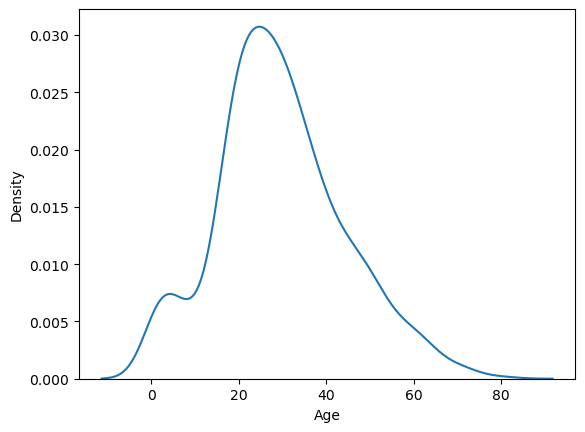

In [11]:
#plotting age column

sns.kdeplot(df['Age'])

In [12]:
df['Age'].mean()

29.69911764705882

In [13]:
df['Age'].std()


14.526497332334044

In [14]:
df_age = np.random.randint(df['Age'].mean()-df['Age'].std(),df['Age'].mean()+df['Age'].std(),177)


In [15]:
df['Age'][df['Age'].isnull()] = df_age


C:\Users\navin\AppData\Local\Temp\ipykernel_16248\2733103494.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'][df['Age'].isnull()] = df_age


In [16]:
df.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [17]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.633187,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.557343,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [19]:
df['Embarked'].isnull().sum()

2

In [20]:
print(df['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [21]:
df['Embarked'] = df['Embarked'].fillna('S')


In [22]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [24]:
#EDA

df.groupby(['Pclass'])['Survived'].mean()


Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [25]:
df.groupby(['Sex'])['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [26]:
df.groupby(['Embarked'])['Survived'].mean()


Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

In [27]:
df['Family'] = df['SibSp'] +df['Parch'] + 1


In [28]:
df['Family'].value_counts()


1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: Family, dtype: int64

In [29]:
def cal(number):
    if(number==1):
        return "Alone"
    elif number>1 and number<5:
        return "Medium"
    else:
        return "Large"

In [30]:
df['Family_size']=df['Family'].apply(cal)


In [31]:
df.head(10)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Family_size
0,1,0,3,male,22.0,1,0,7.2500,S,2,Medium
1,2,1,1,female,38.0,1,0,71.2833,C,2,Medium
2,3,1,3,female,26.0,0,0,7.9250,S,1,Alone
3,4,1,1,female,35.0,1,0,53.1000,S,2,Medium
4,5,0,3,male,35.0,0,0,8.0500,S,1,Alone
5,6,0,3,male,34.0,0,0,8.4583,Q,1,Alone
6,7,0,1,male,54.0,0,0,51.8625,S,1,Alone
7,8,0,3,male,2.0,3,1,21.0750,S,5,Large
8,9,1,3,female,27.0,0,2,11.1333,S,3,Medium
9,10,1,2,female,14.0,1,0,30.0708,C,2,Medium


In [32]:
df = df.drop('SibSp',axis=1)

df = df.drop('Parch',axis=1)

df = df.drop('Family',axis=1)
df = df.drop('PassengerId',axis=1)

In [33]:
df.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
Family_size    0
dtype: int64

In [34]:
df.shape


(891, 7)

In [35]:
df=pd.get_dummies(df,columns =['Pclass','Sex','Embarked','Family_size'],drop_first=True)


In [36]:
df

,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Family_size_Large,Family_size_Medium
0,0,22.0,7.2500,0,1,1,0,1,0,1
1,1,38.0,71.2833,0,0,0,0,0,0,1
2,1,26.0,7.9250,0,1,0,0,1,0,0
3,1,35.0,53.1000,0,0,0,0,1,0,1
4,0,35.0,8.0500,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,13.0000,1,0,1,0,1,0,0
887,1,19.0,30.0000,0,0,0,0,1,0,0
888,0,43.0,23.4500,0,1,0,0,1,0,1
889,1,26.0,30.0000,0,0,1,0,0,0,0


In [37]:
df.shape

(891, 10)

C:\Users\navin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

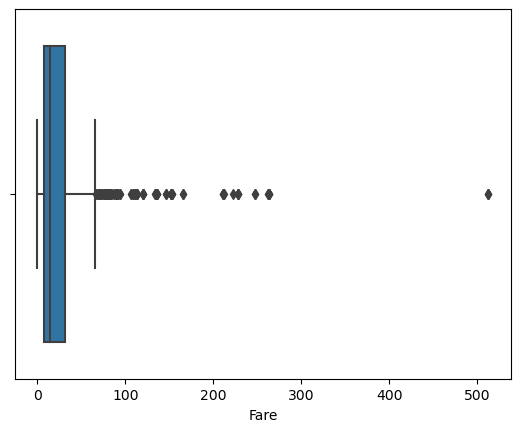

In [38]:
#checking Outliers
sns.boxplot(df['Fare'],data=df)

C:\Users\navin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

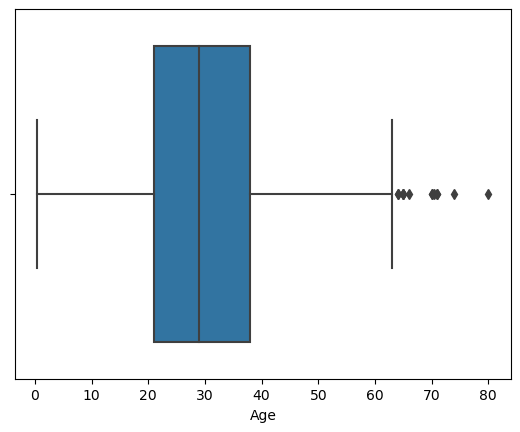

In [39]:
sns.boxplot(df['Age'],data=df)

In [40]:
#finding skewness

print('skewness value of Age: ',df['Age'].skew())
print('skewness value of Fare: ',df['Fare'].skew())

skewness value of Age:  0.38592912137482405
skewness value of Fare:  4.787316519674893


In [41]:
#Removing Outliers
IQR =stats.iqr(df.Fare,interpolation='midpoint')
IQR

23.0896

In [42]:
Q1=df.Fare.quantile(0.25)
Q3=df.Fare.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(-26.724, 65.6344)

In [43]:
df.loc[df.Fare<min_limit]


,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Family_size_Large,Family_size_Medium


In [44]:
df.loc[df.Fare>max_limit]


,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Family_size_Large,Family_size_Medium
1,1,38.0,71.2833,0,0,0,0,0,0,1
27,0,19.0,263.0000,0,0,1,0,1,1,0
31,1,43.0,146.5208,0,0,0,0,0,0,1
34,0,28.0,82.1708,0,0,1,0,0,0,1
52,1,49.0,76.7292,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
846,0,40.0,69.5500,0,1,1,0,1,1,0
849,1,34.0,89.1042,0,0,0,0,0,0,1
856,1,45.0,164.8667,0,0,0,0,1,0,1
863,0,30.0,69.5500,0,1,0,0,1,1,0


In [45]:
df.loc[df['Fare']>max_limit,'Fare']=np.median(df.Fare)


In [46]:
df.loc[df.Fare>max_limit]


,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Family_size_Large,Family_size_Medium


C:\Users\navin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

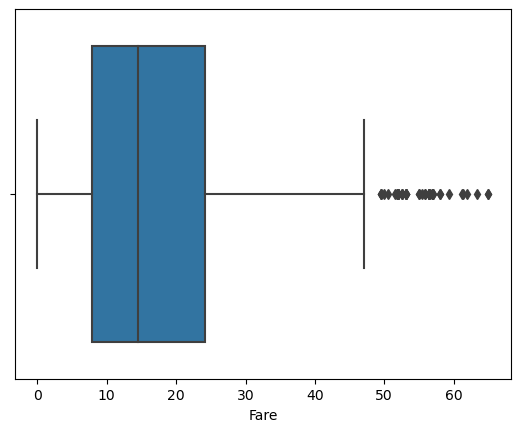

In [47]:
sns.boxplot(df['Fare'],data=df)


In [48]:
#Giving values to x and y variable

In [50]:
y = df['Survived']
x = df.drop(['Survived'],axis=1)

In [52]:
#Splitting into Test data and Train data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=42)


In [53]:
x_train.shape


(712, 9)

In [54]:
#Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)


In [55]:
x_train


array([[ 1.17630721,  0.90855011, -0.51880845, ...,  0.59248936,
        -0.27776937, -0.69522179],
       [-0.48258412, -0.33125803,  1.92749365, ...,  0.59248936,
        -0.27776937, -0.69522179],
       [ 0.18097241, -0.73719521, -0.51880845, ...,  0.59248936,
        -0.27776937, -0.69522179],
       ...,
       [ 0.84452895, -0.24260775, -0.51880845, ...,  0.59248936,
        -0.27776937,  1.4383899 ],
       [-1.14614066, -0.21494003, -0.51880845, ...,  0.59248936,
        -0.27776937,  1.4383899 ],
       [-0.63004113, -0.21494003, -0.51880845, ...,  0.59248936,
        -0.27776937,  1.4383899 ]])

In [57]:
#Building and Evaluating SVM MODEL

from sklearn.svm import SVC
svmclf = SVC(kernel = 'linear')
svmclf.fit(x_train,y_train)

SVC(kernel='linear')

In [58]:
y_pred_svm = svmclf.predict(x_test)


In [59]:
from sklearn.metrics import accuracy_score, confusion_matrix


In [60]:
print("accuracy =",accuracy_score(y_test,y_pred_svm))


accuracy = 0.7932960893854749


In [61]:
print(confusion_matrix(y_test,y_pred_svm))


[[92 13]
 [24 50]]


In [62]:
svmclf = SVC(kernel = 'rbf')
svmclf.fit(x_train,y_train)
y_pred_svm = svmclf.predict(x_test)
print("accuracy =",accuracy_score(y_test,y_pred_svm))

accuracy = 0.8212290502793296


In [63]:
svmclf = SVC(kernel = 'poly')
svmclf.fit(x_train,y_train)
y_pred_svm = svmclf.predict(x_test)
print("accuracy =",accuracy_score(y_test,y_pred_svm))

accuracy = 0.8268156424581006


In [65]:
#KFOLD VALIDATION -SVM MODEL

#KFOLD FOR SVM
from sklearn.model_selection import KFold
kfold_validator=KFold(10)

In [66]:
for train_index,test_index in kfold_validator.split(x,y):
    print('Training index:',train_index)
    print('Testing index:',test_index)

Training index: [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 33

In [67]:
#svm - Kfold
from sklearn.model_selection import cross_val_score

In [69]:
cv_score=cross_val_score(svmclf,x,y,cv=kfold_validator)
cv_score


array([0.55555556, 0.74157303, 0.62921348, 0.53932584, 0.60674157,
       0.6741573 , 0.62921348, 0.68539326, 0.68539326, 0.65168539])

In [70]:
np.mean(cv_score) #average score


0.6398252184769039

In [72]:
#STRATIFIED K FOLD VALIDATION - SVM MODEL

#stratified for svm
from sklearn.model_selection import StratifiedKFold
skfold_validator=StratifiedKFold(10)

In [73]:
for train_index,test_index in skfold_validator.split(x,y):
    print('Training index:',train_index)
    print('Testing index:',test_index)

Training index: [ 82  84  85  88  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 33

In [74]:
from sklearn.model_selection import cross_val_score


In [75]:
skcv_score=cross_val_score(svmclf,x,y,cv=skfold_validator)


In [76]:
skcv_score


array([0.58888889, 0.62921348, 0.62921348, 0.64044944, 0.65168539,
       0.65168539, 0.66292135, 0.69662921, 0.65168539, 0.62921348])

In [77]:
np.mean(skcv_score)#average score


0.6431585518102372

In [78]:
#BUILDING AND EVALUATING KNN MODEL


In [79]:
#knn
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(1,15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
    model = classifier.fit(x_train,y_train)
    y_pred_knn = model.predict(x_test)
    acc = accuracy_score(y_test,y_pred_knn)
    metric_k.append(acc)

C:\Users\navin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\navin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [80]:
metric_k


[0.776536312849162,
 0.8212290502793296,
 0.8100558659217877,
 0.8324022346368715,
 0.8156424581005587,
 0.7988826815642458,
 0.8435754189944135,
 0.8491620111731844,
 0.8212290502793296,
 0.8379888268156425,
 0.8324022346368715,
 0.8212290502793296,
 0.8212290502793296,
 0.8044692737430168]

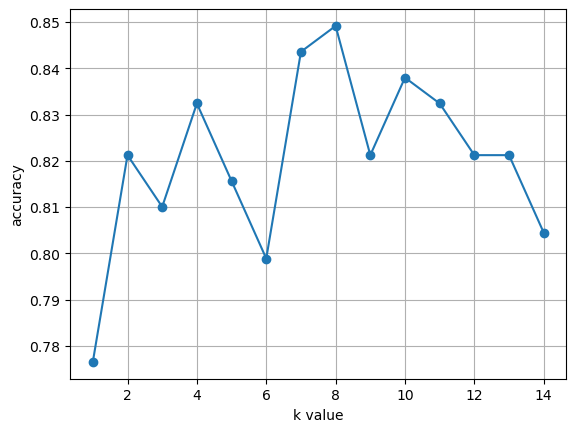

In [81]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [82]:
classifier = KNeighborsClassifier(n_neighbors=7,metric='minkowski',p=2)
model = classifier.fit(x_train,y_train)
y_pred_knn= model.predict(x_test)
acc = accuracy_score(y_test,y_pred_knn)
metric_k.append(acc)


C:\Users\navin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [83]:
y_pred_knn


array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [84]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
result = confusion_matrix(y_test,y_pred_knn)
print('Confusion Matrix:\n', result)
result1 = classification_report(y_test,y_pred_knn)
print('Classification Report:\n',result1)
result2 = accuracy_score(y_test,y_pred_knn)
print('Accuracy:\n',result2)

Confusion Matrix:
 [[90 15]
 [13 61]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.87       105
           1       0.80      0.82      0.81        74

    accuracy                           0.84       179
   macro avg       0.84      0.84      0.84       179
weighted avg       0.84      0.84      0.84       179

Accuracy:
 0.8435754189944135


In [85]:
#kfold for knn

from sklearn.model_selection import KFold
kfold_validator=KFold(10)

In [86]:
for train_index,test_index in kfold_validator.split(x,y):
    print('Training index:',train_index)
    print('Testing index:',test_index)

Training index: [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 33

In [87]:
from sklearn.model_selection import cross_val_score


In [88]:
cv_score=cross_val_score(model,x,y,cv=kfold_validator)


C:\Users\navin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\navin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [89]:
cv_score



array([0.65555556, 0.66292135, 0.6741573 , 0.64044944, 0.69662921,
       0.73033708, 0.69662921, 0.68539326, 0.66292135, 0.7752809 ])

In [90]:
np.mean(cv_score) #average score


0.6880274656679151

In [91]:
#STRATIFIED K FOLD VALIDATION - KNN MODEL

In [93]:
#stratified for knn
from sklearn.model_selection import StratifiedKFold
skfold_validator=StratifiedKFold(10)

In [94]:
for train_index,test_index in skfold_validator.split(x,y):
    print('Training index:',train_index)
    print('Testing index:',test_index)

Training index: [ 82  84  85  88  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 33

In [95]:
from sklearn.model_selection import cross_val_score


In [96]:
skcv_score=cross_val_score(model,x,y,cv=skfold_validator)


C:\Users\navin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\navin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [97]:
skcv_score



array([0.64444444, 0.62921348, 0.62921348, 0.6741573 , 0.70786517,
       0.71910112, 0.71910112, 0.68539326, 0.66292135, 0.76404494])

In [98]:
np.mean(skcv_score) #average score


0.68354556803995

In [99]:
#the average score is 0.68354556803995
